## MNIST Multi-Class Classification using the Artificial Nural Network(ANN)

In [1]:
# Importing libraries
import tensorflow
import matplotlib.pyplot as plt 
import kerastuner as kt
import numpy as np

from tensorflow import keras
from keras.datasets import mnist
from keras import Sequential
from keras.layers import Dropout, Dense, Flatten
from keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score

/var/folders/15/hcx9cgbn48z9wk5ngpns6jl40000gn/T/ipykernel_99035/1781662784.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [2]:
# Loading the MNIST Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Check the shape of the traing data
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
# Check the sahpe of testing data
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

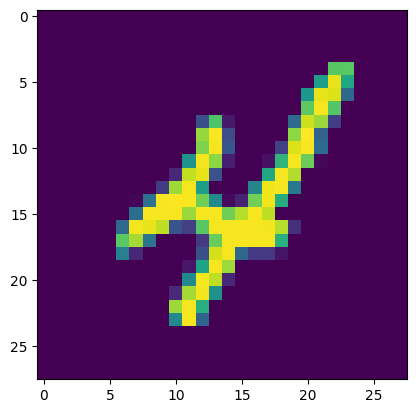

In [5]:
# Visualize the MNIST data
plt.imshow(X_train[9]);

In [6]:
# Data before normalization
X_train[0], X_test[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

In [7]:
# Normalizing the data 
X_train = X_train/255
X_test = X_test/255

In [8]:
# Data after normalization
X_train[0], X_test[0]

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

## Building a Model

In [28]:
# Building the Nural Network
model = Sequential()

# Flattning the input into 1D 28x28 input nodes
model.add(Flatten(input_shape=(28,28)))

# Hidden Layers 
model.add(Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))

# Output Layer with 10 nodes. To classify 10 digits
model.add(Dense(10, activation='softmax'))


/Users/vishnumr/My Files/Programs/Python/AIML and DeepLearning Projects/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
# Getting the summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541,802 (2.07 MB)

 Trainable params: 541,802 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Setting up the optimizees
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Learning Rate Scheulding
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-4)

# Batch Size and Epoches
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [43]:
# Compiling the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Fitting the model before tuning the hyperparameters
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=50, batch_size=64, 
                    callbacks=[early_stopping, lr_scheduler])

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9566 - loss: 0.2672 - val_accuracy: 0.9704 - val_loss: 0.2447 - learning_rate: 0.0010
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9603 - loss: 0.2876 - val_accuracy: 0.9696 - val_loss: 0.2520 - learning_rate: 0.0010
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9594 - loss: 0.2998 - val_accuracy: 0.9728 - val_loss: 0.2482 - learning_rate: 0.0010
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9618 - loss: 0.2997 - val_accuracy: 0.9729 - val_loss: 0.2525 - learning_rate: 0.0010
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9687 - loss: 0.2681 - val_accuracy: 0.9784 - val_loss: 0.2061 - learning_rate: 5.0000e-04
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9721 - loss: 0.2360 - val_accuracy: 0.9789 - val_loss: 0.1974 - learning_rate: 5.0000e-04
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9701 - loss: 0

In [45]:
# Making the predictions
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step


In [46]:
y_prob[0]

array([8.1826983e-07, 3.1133836e-06, 2.1623329e-05, 3.6384896e-05,
       1.4112518e-06, 2.6252571e-06, 3.6062154e-08, 9.9991757e-01,
       3.5836587e-07, 1.6146085e-05], dtype=float32)

In [47]:
y_pred = y_prob.argmax(axis=1)

In [48]:
y_pred[0]

np.int64(7)

In [49]:
accuracy_score(y_test, y_pred)

0.9844

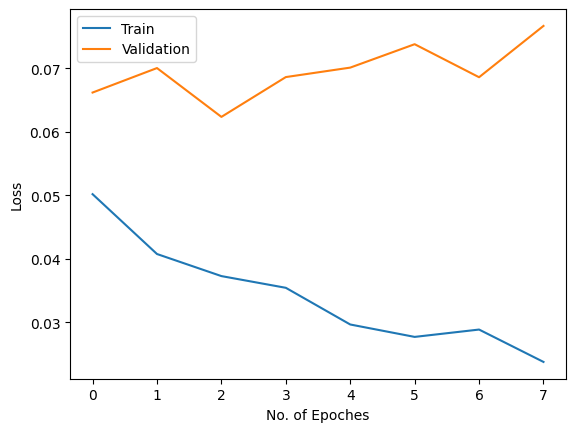

In [72]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel("No. of Epoches")
plt.ylabel("Loss")
plt.legend()
plt.show()

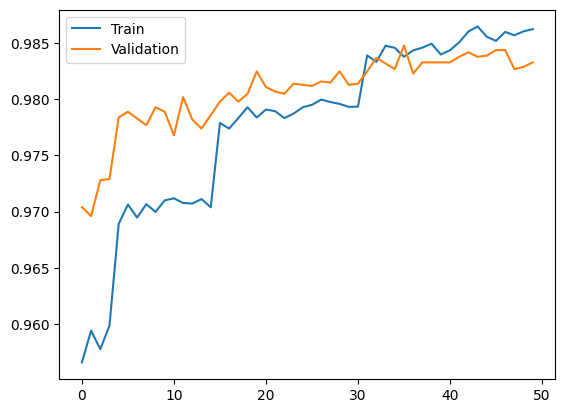

In [51]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

## Tuning the HyperParameters
* Number of neurons
* Number of layers
* Optimizers 
* Activation function

In [52]:
def build_model(hp):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(hp.Int('units', 128, 512, step=64), activation='relu'),
        keras.layers.Dropout(hp.Float('dropout', 0.2, 0.5, step=0.1)),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [ ]:
# Calling the keras Hyperband 
tuner = kt.Hyperband(build_model, objective='val_accuracy', max_epochs=20, factor=3)
tuner.search(X_train, y_train, validation_data=(X_test, y_test))


Trial 30 Complete [00h 01m 15s]
val_accuracy: 0.9847999811172485

Best val_accuracy So Far: 0.9847999811172485
Total elapsed time: 00h 13m 42s


In [59]:
# Getting the best hyperparameters 
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


In [60]:
# Building the best model
best_model = tuner.hypermodel.build(best_hps)

/Users/vishnumr/My Files/Programs/Python/AIML and DeepLearning Projects/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##  Training the best model with the complete data.


In [63]:
# Setting up the early stopping callback 
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=True)

# Fitting the best model
history = best_model.fit(X_train, y_train, 
                        validation_data= (X_test, y_test),
                        epochs=50,
                        batch_size=32, 
                        callbacks=[early_stopping])



Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9851 - loss: 0.0482 - val_accuracy: 0.9803 - val_loss: 0.0662
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9886 - loss: 0.0356 - val_accuracy: 0.9795 - val_loss: 0.0700
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9882 - loss: 0.0354 - val_accuracy: 0.9829 - val_loss: 0.0623
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9885 - loss: 0.0324 - val_accuracy: 0.9825 - val_loss: 0.0686
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9903 - loss: 0.0274 - val_accuracy: 0.9811 - val_loss: 0.0701
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9923 - loss: 0.0245 - val_accuracy: 0.9802 - val_loss: 0.0738
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9910 - loss: 0.0270 - val_accuracy: 0.9831 - val_loss: 0.0686
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9929 - loss: 0.0227 - 

In [66]:
# Making the predictions
y_prob = best_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step


In [67]:
y_pred = y_prob.argmax(axis=1)

In [68]:
y_prob[0]

array([1.9606743e-10, 1.0460275e-11, 1.3256152e-08, 5.5804179e-07,
       5.5539635e-14, 3.7678471e-10, 3.8000774e-15, 9.9999940e-01,
       2.4489250e-10, 5.3358750e-08], dtype=float32)

In [69]:
y_pred[0]

np.int64(7)

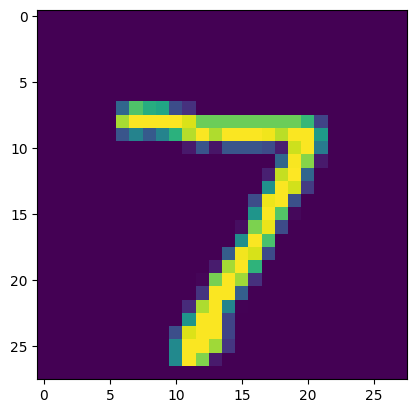

In [70]:
plt.imshow(X_test[0])

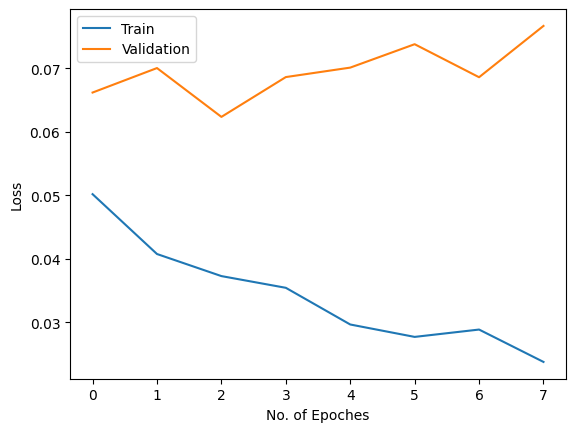

In [73]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel("No. of Epoches")
plt.ylabel("Loss")
plt.legend()
plt.show()

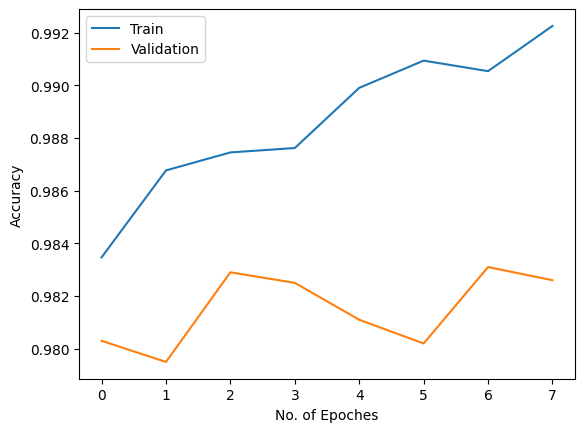

In [74]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel("No. of Epoches")
plt.ylabel("Accuracy")
plt.legend()
plt.show()